Esta notebook contiene bloques de código útiles para realizar Q-learning en el entorno "Taxi"

In [395]:
import numpy as np
import random
from taxi_env_extended import TaxiEnvExtended

In [396]:
env = TaxiEnvExtended()

Obtener la cantidad de estados y acciones

In [397]:
actions = env.action_space.n
states = env.observation_space.n

Inicialización de la tabla Q

In [398]:
Q = np.zeros((states, actions))
Q

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

Obtención de la acción a partir de la tabla Q

In [399]:
def optimal_policy(state, Q):
    action = np.argmax(Q[state])
    return action

Epsilon-Greedy Policy

In [400]:
def epsilon_greedy_policy(state, Q, epsilon=0.1):
    explore = np.random.binomial(1, epsilon)
    if explore:
        action = env.action_space.sample()\
    
    else: # exploit
        action = np.argmax(Q[state])\
        
    return action

Ejemplo de episodio 

In [401]:
obs,_ = env.reset()
print(obs)
done = False
total_reward = 0
step_count = 0
while not done:
    state = obs
    action = epsilon_greedy_policy(state, Q, 0.5)
    obs, reward, done, _, _ = env.step(action)
    total_reward += reward
    step_count += 1
    print('->', state, action, reward, obs, done)
    env.render()
print('total_reward', total_reward)
print('total_steps', step_count)

9
-> 9 2 -1 29 False
-> 29 0 -1 129 False
-> 129 3 -1 109 False
-> 109 4 -10 109 False
-> 109 0 -1 209 False
-> 209 3 -1 209 False
-> 209 5 -10 209 False
-> 209 0 -1 309 False
-> 309 0 -1 409 False
-> 409 0 -1 409 False
-> 409 2 -1 409 False
-> 409 0 -1 409 False
-> 409 1 -1 309 False
-> 309 0 -1 409 False
-> 409 3 -1 409 False
-> 409 4 -1 417 False
-> 417 5 -1 409 False
-> 409 0 -1 409 False
-> 409 4 -1 417 False
-> 417 3 -1 417 False
-> 417 1 -1 317 False
-> 317 1 -1 217 False
-> 217 0 -1 317 False
-> 317 0 -1 417 False
-> 417 1 -1 317 False
-> 317 1 -1 217 False
-> 217 1 -1 117 False
-> 117 0 -1 217 False
-> 217 2 -1 237 False
-> 237 0 -1 337 False
-> 337 2 -1 357 False
-> 357 0 -1 457 False
-> 457 1 -1 357 False
-> 357 1 -1 257 False
-> 257 1 -1 157 False
-> 157 0 -1 257 False
-> 257 0 -1 357 False
-> 357 0 -1 457 False
-> 457 1 -1 357 False
-> 357 0 -1 457 False
-> 457 0 -1 457 False
-> 457 1 -1 357 False
-> 357 0 -1 457 False
-> 457 3 -1 437 False
-> 437 0 -1 437 False
-> 437 2 -

Generar muchos episodios

In [402]:
max_steps = env.max_steps
max_steps

200

In [403]:
episodes = 80000

In [404]:
alpha=1 / (max_steps+1)
alpha

0.004975124378109453

In [405]:
gamma = 0.9

In [406]:
epsilon =0.99

In [407]:
rewards=[]
steps=[]

In [408]:
from tqdm import tqdm

In [409]:
i = 0
success = 0
for i in tqdm(range(episodes)):
    
    total_reward = 0    
    step_count = 0
    obs, _ = env.reset()
    done=False
    while not done:
        state = obs
        action = epsilon_greedy_policy(state, Q, epsilon)
        obs, reward, done, _, _ = env.step(action)
        
        total_reward += reward
        step_count += 1
        if (reward ==20):
            success+=1
                      
        value = Q[state][action] + alpha*(reward + gamma*np.max(Q[obs]) - Q[state][action])
        Q[state][action] = value
    
    rewards.append(total_reward)
    steps.append(step_count)
    i=i+1
    if (i %  4== 0) and (epsilon > 0.01):  
        epsilon *= 0.99
print(success)


100%|██████████| 80000/80000 [01:20<00:00, 990.39it/s] 

76932


In [410]:
epsilon

0.009920974201040588

In [411]:
print(success/episodes*100, '%')

96.165 %


In [412]:
import matplotlib.pyplot as plt


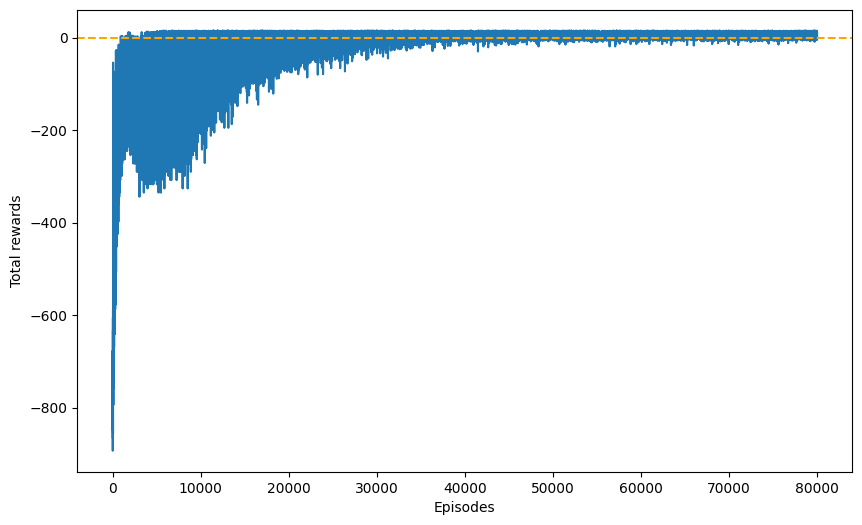

In [423]:
plt.figure(figsize=(10, 6))
plt.plot(rewards, label='Rewards')
plt.axhline(y=0, color='orange', linestyle='--', label='Baseline')
plt.ylabel('Total rewards')
plt.xlabel('Episodes') 
plt.show()

In [414]:
Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.98054358, -2.96983758, -3.06891477, -2.8942729 ,  1.62261467,
        -3.33297035],
       [-1.34501153, -1.46473975, -1.57694866, -1.26423595,  7.7147    ,
        -1.88607943],
       ...,
       [-0.7882399 , -0.60619239, -0.78346481, -0.78615728, -0.8279174 ,
        -0.78336444],
       [-2.14630702, -2.14459692, -2.1435719 , -1.89687141, -2.16290182,
        -2.18360287],
       [-0.03439286, -0.02998923, -0.02478424,  3.00207373, -0.09925497,
        -0.04975124]])

In [415]:
policy=[]
for i in tqdm(range(states)):
    best_action = np.argmax(Q[i])
    policy.append(best_action)

print(policy)

100%|██████████| 500/500 [00:00<00:00, 230735.17it/s]

[0, 4, 4, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 3, 4, 0, 4, 4, 3, 3, 0, 3, 0, 0, 0, 0, 3, 5, 3, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 3, 1, 0, 1, 1, 3, 3, 0, 3, 3, 3, 3, 0, 3, 1, 3, 3, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 2, 3, 3, 0, 3, 2, 2, 2, 0, 3, 2, 3, 2, 0, 3, 3, 3, 1, 0, 2, 1, 3, 3, 0, 3, 2, 2, 2, 0, 3, 2, 3, 2, 0, 3, 3, 3, 1, 0, 1, 1, 3, 3, 0, 3, 0, 0, 0, 0, 3, 2, 3, 0, 0, 3, 3, 3, 1, 0, 1, 1, 3, 3, 0, 3, 3, 3, 3, 0, 3, 1, 3, 3, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 

In [416]:
rewards_testing=[]
steps_testing=[]

In [417]:
i = 0
while i< 20:
    print("episode:", i+1)
    obs,_ = env.reset()
    done = False
    total_reward = 0
    step_count = 0
    while not done:
        state = obs
        action = policy[state]
        obs, reward, done, _, _ = env.step(action)
        total_reward += reward
        step_count += 1
        env.render()
    i+=1
    rewards_testing.append(total_reward)
    steps_testing.append(step_count)
    print('-> total reward: ', total_reward)
    print('-> total steps: ', step_count)

episode: 1
-> total reward:  6
-> total steps:  15
episode: 2
-> total reward:  6
-> total steps:  15
episode: 3
-> total reward:  4
-> total steps:  17
episode: 4
-> total reward:  4
-> total steps:  17
episode: 5
-> total reward:  6
-> total steps:  15
episode: 6
-> total reward:  8
-> total steps:  13
episode: 7
-> total reward:  12
-> total steps:  9
episode: 8
-> total reward:  7
-> total steps:  14
episode: 9
-> total reward:  6
-> total steps:  15
episode: 10
-> total reward:  12
-> total steps:  9
episode: 11
-> total reward:  5
-> total steps:  16
episode: 12
-> total reward:  7
-> total steps:  14
episode: 13
-> total reward:  12
-> total steps:  9
episode: 14
-> total reward:  8
-> total steps:  13
episode: 15
-> total reward:  5
-> total steps:  16
episode: 16
-> total reward:  9
-> total steps:  12
episode: 17
-> total reward:  5
-> total steps:  16
episode: 18
-> total reward:  6
-> total steps:  15
episode: 19
-> total reward:  5
-> total steps:  16
episode: 20
-> total 

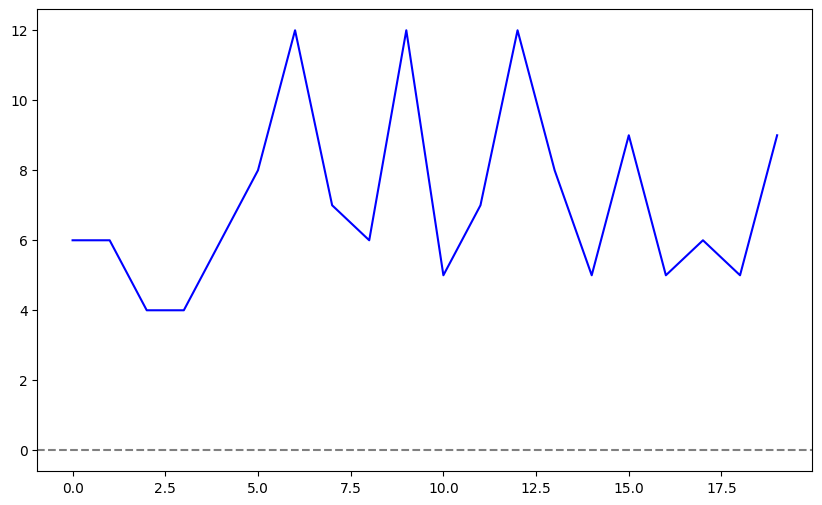

In [418]:
# Plot rewards
plt.figure(figsize=(10, 6))
plt.plot(rewards_testing, color='blue', label='Episode steps')
plt.axhline(y=0, color='gray', linestyle='--', label='Baseline')

In [419]:
average_steps = np.mean(steps_testing)
print("average steps: ", average_steps)
average_rewards = np.mean(rewards_testing)
print("Average rewards: ", average_rewards)

average steps:  13.9
Average rewards:  7.1


In [420]:
obs,_ = env.reset()
done = False
rewardss = []
total_reward = 0
step_count = 0
while not done:
    state = obs
    action = policy[state]
    obs, reward, done, _, _ = env.step(action)
    total_reward += reward
    step_count += 1
    
    rewardss.append(total_reward)
    env.render()
i+=1
print('-> total reward: ', rewardss)
print('-> total steps: ', step_count)

-> total reward:  [-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, 6]
-> total steps:  15


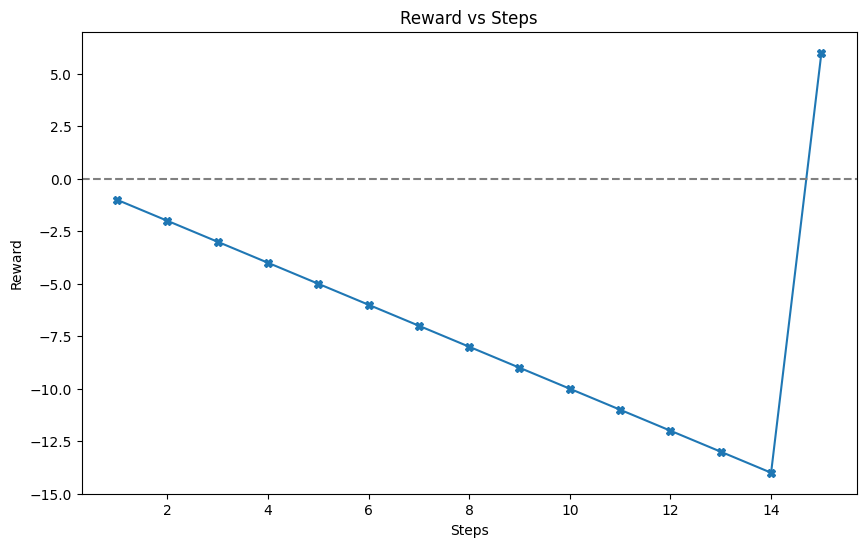

In [421]:
shifted_steps = [step + 1 for step in range(step_count)]

# Plot rewards vs steps
plt.figure(figsize=(10, 6))
plt.plot(shifted_steps, rewardss, marker='X')  # Use 'X' for markers
plt.axhline(y=0, color='gray', linestyle='--', label='Baseline')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Reward vs Steps')
plt.show()